#TEXT PREPROCESSING IN NLP
* BASIC FIRST STEP IN NLP
* MY FIRST PROJECT 1

## Text preprocessing is an essential step in natural language processing (NLP) that involves cleaning and transforming unstructured text data to prepare it for analysis. It includes tokenization, stemming, lemmatization, stop-word removal, and part-of-speech tagging

**Some of the preprocessing steps are:**

* Removing punctuations like . , ! $( ) * % @
* Removing URLs
* Removing Stop words
* Lower casing
 *Tokenization
* Stemming
* Lemmatization

* Corpus:
Corpus means a collection of text. It could be data sets of anything containing texts be it poems by a certain poet, bodies of work by a certain author, etc. In this case, we are going to use a data set of pre-determined stop words.
* Tokenizers-
it divides a text into a series of tokens. There are three main tokenizers – word, sentence, and regex tokenizer. We will only use the word and sentence tokenizer

* Removing Stop Words and storing them in a separate array of words.
* Create a frequency table of words.
*

## **PROJECT 1 :SMS Spam Data for Text Preprocessing**

In [2]:
# import the necessary libraries
import nltk  # performing various NLP tasks.
import string
import re   #  This is the regular expression library in Python. It's used for pattern matching with strings.

In [3]:
import pandas as pd
import numpy as np

In [ ]:
# If you uploaded the file directly

url='https://drive.google.com/uc?id=1mcnubs9JIAwTXY1gVlr-w74PeLVfqUnJ/sms_spam.csv'
df = pd.read_csv(url)

HTTPError: ignored

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
print(os.getcwd())


/content


In [6]:
df = pd.read_csv('/content/drive/MyDrive/MY DS PROJECT PRACTICEOCT 23/sms_spam.csv')

In [ ]:
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [7]:
#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)

<ipython-input-7-8757229a9a8e>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [8]:
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+"
4,spam,okmail: Dear Dave this is your final notice to collect your 4* Tenerife Holiday or #5000 CASH award! Call 09061743806 from landline. TCs SAE Box326 CW25WX 150ppm


In [9]:
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+"
4,spam,okmail: Dear Dave this is your final notice to collect your 4* Tenerife Holiday or #5000 CASH award! Call 09061743806 from landline. TCs SAE Box326 CW25WX 150ppm


In [ ]:
# 'ham': (non-spam) or 'spam

In [10]:
df.shape #size of datset

(5559, 2)

In [ ]:
df.columns

Index(['type', 'text'], dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=5559, step=1)

In [ ]:
# checking the count of the dependent variable
df['type'].value_counts() #4812 non spam message ,spam messages are :747

ham     4812
spam    747 
Name: type, dtype: int64

In [11]:
text_information = df['text']
print(text_information.head())


0    Hope you are having a good week. Just checking in                                                                                                                
1    K..give back my thanks.                                                                                                                                          
2    Am also doing in cbe only. But have to pay.                                                                                                                      
3    complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+            
4    okmail: Dear Dave this is your final notice to collect your 4* Tenerife Holiday or #5000 CASH award! Call 09061743806 from landline. TCs SAE Box326 CW25WX 150ppm
Name: text, dtype: object


In [ ]:
df['text'].unique()

array(['Hope you are having a good week. Just checking in',
       'K..give back my thanks.',
       'Am also doing in cbe only. But have to pay.', ...,
       "If you don't, your prize will go to another customer. T&C at www.t-c.biz 18+ 150p/min Polo Ltd Suite 373 London W1J 6HL Please call back if busy ",
       'SMS. ac JSco: Energy is high, but u may not know where 2channel it. 2day ur leadership skills r strong. Psychic? Reply ANS w/question. End? Reply END JSCO',
       'Shall call now dear having food'], dtype=object)

In [ ]:
df['text'].nunique() # total 5559 text ou of which unique are 5156 ,so some are duplicates emails .

5156

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


In [12]:
#check duplicates
dup=df[df.duplicated(subset=['text'], keep=False)]


In [13]:
df = df.drop_duplicates(subset=['text'])

# Reset the index after dropping duplicates
df = df.reset_index(drop=True)

In [ ]:
df.shape # reduced rows


(5156, 2)

# II. text prerocessing /cleaning the data:

***1. remove punctuations :***
*  list of punctuations such as ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’

In [14]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
# Define a function to remove punctuation from a text
def remove_punctuation(text):
    import re
    return re.sub(r'[^\w\s]', '', text)

# Apply the function to the 'text' column
df['text'] = df['text'].apply(remove_punctuation)

*re.sub(r'[^\w\s]', '', text): This regular expression pattern r'[^\w\s]' matches any character that is not a word character (\w, which includes letters, digits, and underscores) or a whitespace character (\s). re.sub() is used to substitute these characters with an empty string, effectively removing them.*

In [16]:
print(df['text'].iloc[0])  # check punctuation row ?

Hope you are having a good week Just checking in


**2. remove the no.s ?**

In [17]:
# Define a function to remove numbers from a text
def remove_numbers(text):
    return re.sub(r'\d+', '', text)
#This regular expression pattern r'\d+' matches one or more digits (\d+).
#re.sub() is used to substitute these digits with an empty string, effectively removing them.

df['text'] = df['text'].apply(remove_numbers)


In [18]:
df['text'].iloc[3]

'complimentary  STAR Ibiza Holiday or  cash needs your URGENT collection  NOW from Landline not to lose out BoxSKWPPPM'

**3. Lowering the text**

In [19]:
# Convert text to lowercase
df['text'] = df['text'].str.lower()


In [20]:
df['text'].iloc[3]

'complimentary  star ibiza holiday or  cash needs your urgent collection  now from landline not to lose out boxskwpppm'

**4.REMOVE WHITESPACES**
* USING JOIN() AND SPLIT()

In [ ]:
# It's generally a good practice to remove extra whitespaces before tokenization.
#This helps in cases where there are multiple spaces between words.


In [21]:
# Remove extra whitespaces from the 'text' column
df['text'] = df['text'].str.replace(r'\s+', ' ')


<ipython-input-21-f2d6e9f4053d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'\s+', ' ')


In [22]:
df['text'].iloc[3]

'complimentary star ibiza holiday or cash needs your urgent collection now from landline not to lose out boxskwpppm'

**5.Remove stop words**
* Stopwords are the commonly used words and are removed from the text as they do not add any value to the analysis. These words carry less or no meaning.

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:

stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [25]:
def remove_stopwords(text):
    output = [word for word in text.split() if word.lower() not in stopwords]
    return ' '.join(output)

df['text'] = df['text'].apply(remove_stopwords)


In [26]:
df['text'].iloc[3] # here or remove


'complimentary star ibiza holiday cash needs urgent collection landline lose boxskwpppm'

**4. Tokenization**
* In this step, the text is split into smaller units. We can use either sentence tokenization or word tokenization.
* **Word Tokenization:**
Word tokenization splits a text into individual words. This is the most common form of tokenization and is often used in tasks like sentiment analysis, text classification, and language modeling.
 * words = word_tokenize(text)
 * Sentence Tokenization:
**Sentence tokenization** splits a text into individual sentences. This is useful for tasks like machine translation, text summarization, and parsing.
 * sentences = sent_tokenize(text)


*For SMS spam detection, word tokenization is generally more suitable. This is because the goal in spam detection is often to analyze the content of individual words to identify patterns associated with spam messages.*

In [27]:

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
from nltk.tokenize import word_tokenize


def tokenize_text(text):
    return word_tokenize(text)


df['tokenized_text'] = df['text'].apply(tokenize_text)


In [29]:
df['text'].iloc[3]

'complimentary star ibiza holiday cash needs urgent collection landline lose boxskwpppm'

In [ ]:
df.head()

,type,text,tokenized_text
0,ham,hope good week checking,"[hope, good, week, checking]"
1,ham,kgive back thanks,"[kgive, back, thanks]"
2,ham,also cbe pay,"[also, cbe, pay]"
3,spam,complimentary star ibiza holiday cash needs urgent collection landline lose boxskwpppm,"[complimentary, star, ibiza, holiday, cash, needs, urgent, collection, landline, lose, boxskwpppm]"
4,spam,okmail dear dave final notice collect tenerife holiday cash award call landline tcs sae box cwwx ppm,"[okmail, dear, dave, final, notice, collect, tenerife, holiday, cash, award, call, landline, tcs, sae, box, cwwx, ppm]"


**6. Stemming**
* *It is also known as the text standardization step where the words are stemmed or diminished to their root/base form.  For example, words like ‘programmer’, ‘programming, ‘program’ will be stemmed to ‘program’.*

**or 6.Lemmatization:**
* It stems the word but makes sure that it does not lose its meaning
*  lemmatization considers the context and part of speech of the word, which can lead to more accurate results. For example, "better" would be lemmatized to "good" instead of "bet" (which would be the result of stemming).

However, lemmatization tends to be slower and more complex than stemming.

In [30]:
#i prefer lemmatization :
from nltk.stem import WordNetLemmatizer

In [31]:
lemmatizer = WordNetLemmatizer()

In [32]:
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return lemmatized_tokens

In [33]:
nltk.download('wordnet')



[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [34]:
df['lemmatized_tokens'] = df['tokenized_text'].apply(lemmatize_tokens)
df.head()

,type,text,tokenized_text,lemmatized_tokens
0,ham,hope good week checking,"[hope, good, week, checking]","[hope, good, week, checking]"
1,ham,kgive back thanks,"[kgive, back, thanks]","[kgive, back, thanks]"
2,ham,also cbe pay,"[also, cbe, pay]","[also, cbe, pay]"
3,spam,complimentary star ibiza holiday cash needs urgent collection landline lose boxskwpppm,"[complimentary, star, ibiza, holiday, cash, needs, urgent, collection, landline, lose, boxskwpppm]","[complimentary, star, ibiza, holiday, cash, need, urgent, collection, landline, lose, boxskwpppm]"
4,spam,okmail dear dave final notice collect tenerife holiday cash award call landline tcs sae box cwwx ppm,"[okmail, dear, dave, final, notice, collect, tenerife, holiday, cash, award, call, landline, tcs, sae, box, cwwx, ppm]","[okmail, dear, dave, final, notice, collect, tenerife, holiday, cash, award, call, landline, tc, sae, box, cwwx, ppm]"


In [35]:
# TRYING STEEMING ALSO

from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()


In [36]:
#defining a function for stemming
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text

df['msg_stemmed']=df['tokenized_text'].apply(lambda x: stemming(x))

In [37]:
df.head()

,type,text,tokenized_text,lemmatized_tokens,msg_stemmed
0,ham,hope good week checking,"[hope, good, week, checking]","[hope, good, week, checking]","[hope, good, week, check]"
1,ham,kgive back thanks,"[kgive, back, thanks]","[kgive, back, thanks]","[kgive, back, thank]"
2,ham,also cbe pay,"[also, cbe, pay]","[also, cbe, pay]","[also, cbe, pay]"
3,spam,complimentary star ibiza holiday cash needs urgent collection landline lose boxskwpppm,"[complimentary, star, ibiza, holiday, cash, needs, urgent, collection, landline, lose, boxskwpppm]","[complimentary, star, ibiza, holiday, cash, need, urgent, collection, landline, lose, boxskwpppm]","[complimentari, star, ibiza, holiday, cash, need, urgent, collect, landlin, lose, boxskwpppm]"
4,spam,okmail dear dave final notice collect tenerife holiday cash award call landline tcs sae box cwwx ppm,"[okmail, dear, dave, final, notice, collect, tenerife, holiday, cash, award, call, landline, tcs, sae, box, cwwx, ppm]","[okmail, dear, dave, final, notice, collect, tenerife, holiday, cash, award, call, landline, tc, sae, box, cwwx, ppm]","[okmail, dear, dave, final, notic, collect, tenerif, holiday, cash, award, call, landlin, tc, sae, box, cwwx, ppm]"


In [38]:
df[['tokenized_text','lemmatized_tokens','msg_stemmed']].head(3)

,tokenized_text,lemmatized_tokens,msg_stemmed
0,"[hope, good, week, checking]","[hope, good, week, checking]","[hope, good, week, check]"
1,"[kgive, back, thanks]","[kgive, back, thanks]","[kgive, back, thank]"
2,"[also, cbe, pay]","[also, cbe, pay]","[also, cbe, pay]"


*here check row 0 ,row 1 checking ,thanks*

** * HTML tags removal, URL REMOVAL ,Rare words removal, Frequent words removal-stopwords, Spelling checking** imp task

**7.HTML TAG REMOVAL**

In [40]:
#HTML TAG REMOVAL
from bs4 import BeautifulSoup as bt

def remove_html_tags(text):
    soup = bt(text, "html.parser")
    return soup.get_text()


df['cleaned_text'] = df['text'].apply(remove_html_tags)


**8.REMOVE URL**

In [41]:
import re

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


df['remove_url'] = df['text'].apply(remove_urls)


**8. Rare word Removal**
* By removing them, you can reduce the dimensionality of the data and potentially improve the performance of your NLP model.

In [43]:
from collections import Counter

word_freq = Counter(" ".join(df['text']).split())


In [44]:
# Define a threshold for rare words (e.g., words that occur less than 5 times)
threshold = 5
rare_words = set(word for word, freq in word_freq.items() if freq < threshold)

# Remove rare words from text
df['remove_rare'] = df['text'].apply(lambda text: " ".join(word for word in text.split() if word not in rare_words))


In [46]:
df.head(3) # cleanded txt column about html tag removing column

,type,text,tokenized_text,lemmatized_tokens,msg_stemmed,cleaned_text,remove_url,remove_rare
0,ham,hope good week checking,"[hope, good, week, checking]","[hope, good, week, checking]","[hope, good, week, check]",hope good week checking,hope good week checking,hope good week checking
1,ham,kgive back thanks,"[kgive, back, thanks]","[kgive, back, thanks]","[kgive, back, thank]",kgive back thanks,kgive back thanks,back thanks
2,ham,also cbe pay,"[also, cbe, pay]","[also, cbe, pay]","[also, cbe, pay]",also cbe pay,also cbe pay,also cbe pay


**9.Spelling checking **
* *Performing spelling checking in NLP involves identifying and correcting misspelled words in a text*

In [47]:
!pip install spellchecker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 34.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966498 sha256=1c59ac514af31ae504b9af9255e8719637635324bf34014cc5d717ddc21dcd7c
  Stored in directory: /root/.cache/pip/wheels/6c/90/c3/eac248d8755b2a7343487a2087b4b29ad98f388c3c8c69c286
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7121 sha256=8ecff3d1e14762e6fd3248c66e3b9f54cea786e2c184eab22c1f7d3ee81d6f7d
  Stored in directory: /root/.cache/pip/wheels/63/19/2c/5e9f447f2533d457a1167c3e553f235e232b8a639e3f5fafab
  Created wheel for silpa_common: filename=silpa_common-0.3-py3-none-any.whl size=8465 sha256=05912d29f964f1dced2417013bcca6177c4d3649d5383364800af7bbdb45aa38
  Stored in directory: /root/.cache/pip/wheels/c0/72/43/0c7

In [51]:
!pip install --upgrade spellchecker


In [58]:
!pip install pyspellchecker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 28.4 MB/s eta 0:00:00


from spellchecker import SpellChecker

 Initialize the spell checker
spell = SpellChecker()

def correct_spelling(text):
    words = text.split()
    corrected_words = [spell.correction(word) for word in words]
    return " ".join(corrected_words)

Apply the function to the 'text' column
df['spell_check'] = df['text'].apply(correct_spelling)


In [59]:
# no code found it  search more

In [56]:
df['length'] = df['text'].apply(len)
df.head()

,type,text,tokenized_text,lemmatized_tokens,msg_stemmed,cleaned_text,remove_url,remove_rare,length
0,ham,hope good week checking,"[hope, good, week, checking]","[hope, good, week, checking]","[hope, good, week, check]",hope good week checking,hope good week checking,hope good week checking,23
1,ham,kgive back thanks,"[kgive, back, thanks]","[kgive, back, thanks]","[kgive, back, thank]",kgive back thanks,kgive back thanks,back thanks,17
2,ham,also cbe pay,"[also, cbe, pay]","[also, cbe, pay]","[also, cbe, pay]",also cbe pay,also cbe pay,also cbe pay,12


**10 .missing value**

In [62]:
df.isnull().sum() # no null values

type                 0
text                 0
tokenized_text       0
lemmatized_tokens    0
msg_stemmed          0
cleaned_text         0
remove_url           0
remove_rare          0
length               0
dtype: int64

**i have to after tokenzation used separately for that column itself not for text column**

In [65]:
# is last column :df['remove_rare'] important
# drop unimportant columns :

new_df = df.drop(columns=['tokenized_text', 'lemmatized_tokens', 'msg_stemmed', 'cleaned_text', 'remove_url'])

# 'new_df' now contains only the columns you want to keep

# **feature Engineering**
* feature selection ,feature extraction

**1. use TF=IDF:** Term Frequency-Inverse Document Frequency.
* *It is used for text data convert into numerical form*
* *Dimensionality Reduction:It reduces the dimensionality of the feature space compared to BoW, which can lead to more efficient and effective models.*

**learn  TFIDF AND BOW THORGHLY**

In [67]:
new_df.head()

,type,text,remove_rare,length
0,ham,hope good week checking,hope good week checking,23
1,ham,kgive back thanks,back thanks,17
2,ham,also cbe pay,also cbe pay,12
3,spam,complimentary star ibiza holiday cash needs urgent collection landline lose boxskwpppm,complimentary holiday cash needs urgent collection landline lose,86
4,spam,okmail dear dave final notice collect tenerife holiday cash award call landline tcs sae box cwwx ppm,dear final notice collect tenerife holiday cash award call landline tcs sae box ppm,100


In [72]:
new_df['length'] = new_df['remove_rare'].apply(len)

In [75]:
df1 = new_df.drop(columns=['text'])

df1.head()

,type,remove_rare,length
0,ham,hope good week checking,23
1,ham,back thanks,11
2,ham,also cbe pay,12
3,spam,complimentary holiday cash needs urgent collection landline lose,64
4,spam,dear final notice collect tenerife holiday cash award call landline tcs sae box ppm,83


In [76]:
# Create a copy of df1
df2 = df1.copy()


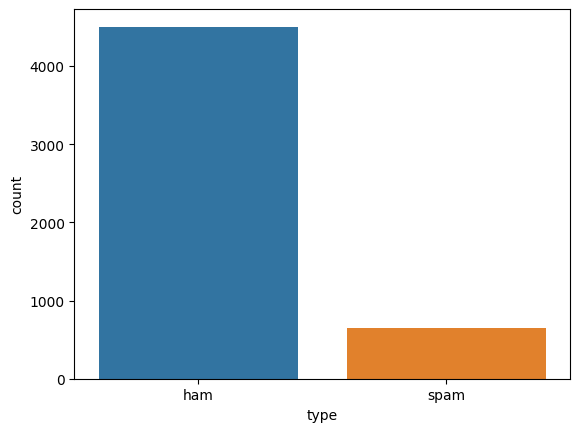

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=df2.type)
plt.show()

In [79]:
# Add a 'Spam' column based on the label mapping
df2["Spam"] = df2['type'].map({'ham': 0, 'spam': 1})


In [81]:
# Drop the original 'type' column
df2.drop(columns=['type'], inplace=True)


KeyError: ignored

In [83]:
df2['clean_text'] = df2['remove_rare']  # Rename 'remove_rare' column to 'clean_text'


In [87]:
 # Drop 'remove_rare' and 'length' columns
df2.drop(columns=['remove_rare', 'length'], inplace=True)

In [90]:
df2.head(5) # ham =0 and spam= 1

,Spam,clean_text
0,0,hope good week checking
1,0,back thanks
2,0,also cbe pay
3,1,complimentary holiday cash needs urgent collection landline lose
4,1,dear final notice collect tenerife holiday cash award call landline tcs sae box ppm


In [ ]:
# apply TF-IDF :
# DO TRAIN TEST SPLIT

**III TRAIN TEST SPLIT THEN TFIDF**

In [93]:
from sklearn.model_selection import train_test_split # train_test_split

In [95]:
# separate input and target varaibles
X = df2['clean_text']  # 'text' is the column with your text data
y = df2['Spam']  # 'Spam' is the target variable

In [98]:
X.shape ,y.shape

((5156,), (5156,))

In [99]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer() # inialize

In [103]:
# Fit and transform on training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform testing data using the same transformer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# TFIDF ONLY APPLY ON INPUT

# **MODEL TRANING**
* LOGISTIC REGRESSION
* USE NAIVE BAYES
* SVM
* RANDOM FOREST CLASSIFIER

**1. Logistic regression**

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [105]:
m1 = LogisticRegression()

In [107]:
m1.fit(X_train_tfidf, y_train) # Train the model

LogisticRegression()

In [109]:
# Predict on the test set
y_pred1 = m1.predict(X_test_tfidf)


In [112]:
# Evaluate the model # CHECK FOR TEST DATA
accuracy = accuracy_score(y_test, y_pred1)
report = classification_report(y_test, y_pred1)

print(f'Accuracy: {accuracy}')
print('Classification Report:')  # DUE UNBLANCE TARGETS so change in recall
print(report)

Accuracy: 0.9641472868217055
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       912
           1       0.99      0.70      0.82       120

    accuracy                           0.96      1032
   macro avg       0.98      0.85      0.90      1032
weighted avg       0.97      0.96      0.96      1032



In [111]:
train_accuracy = m1.score(X_train_tfidf, y_train)
print(f'Training Accuracy: {train_accuracy}')
# GOOD MODEL LESS BIAS AND LESS VARIANCE

Training Accuracy: 0.9689621726479146


**unbalnce target columns i keep as it is lets check other model**

In [117]:
# Generate confusion matrix
conf_mat =confusion_matrix(y_test, y_pred1)
conf_mat

array([[911,   1],
       [ 36,  84]])

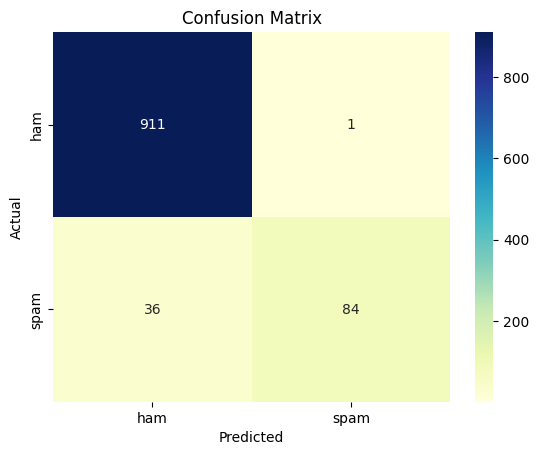

In [118]:
# Plot confusion matrix as a heatmap
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Conclusions :**
- the model 1 is very good at correctly identifying 'ham' messages**
- The model1  is fairly good at identifying 'spam' messages, but there are some False Negatives.

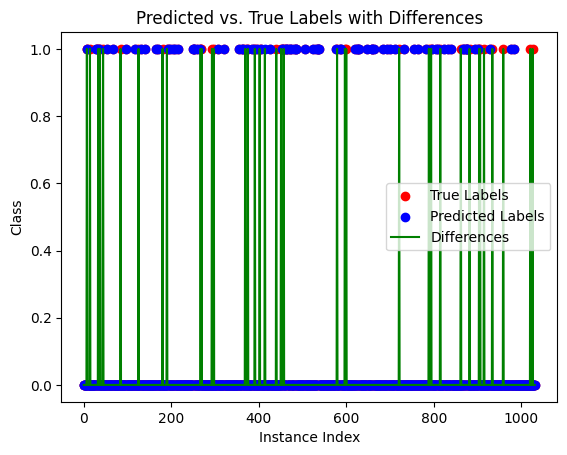

In [125]:
differences = np.abs(y_test - y_pred1)

# Create a scatter plot to show the instances
plt.scatter(range(len(y_test)), y_test, color='red', label='True Labels')
plt.scatter(range(len(y_pred1)), y_pred1, color='blue', label='Predicted Labels')

# Create a line plot to show the differences
plt.plot(range(len(differences)), differences, color='green', label='Differences')

plt.title('Predicted vs. True Labels with Differences')
plt.xlabel('Instance Index')
plt.ylabel('Class')
plt.legend()

plt.show()